# Yelp Reviews Classification

### by ReDay Zarra

This project covers the topic of **natural language processing or NLP to classify 
user-generated text and determine their intent**. The goal of this project is to build
a model that can automatically classify 10,000 Yelp reviews into one of several predefined
categories, such as "positive," "negative," or "neutral." To accomplish this, the 
project uses NLP techniques to process and analyze the text of the reviews.

The model can then be used to predict the label for new, unseen reviews. This can 
be especially useful for businesses, as it can help them **identify patterns in 
customer feedback and make improvements to their products or services**.

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

> Pandas is a library used for data frame manipulations 

> NumPy is a package used for numerical analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

>Libraries used for plotting and data visualization

## Importing the dataset

Importing the dataset with the .read_csv method from Pandas to load the dataset and storing it in the yelp_reviews variable. We can take a glimpse at the dataset with the built-in Pandas methods.

In [3]:
yelp_reviews = pd.read_csv('yelp.csv')

In [4]:
yelp_reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


> The .head() method is used to **show the first five rows** of the dataframe.

In [5]:
yelp_reviews.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


> The .tail() method is used to **show the last five rows** of the dataframe.

In [6]:
yelp_reviews.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


> The **.describe() method from Pandas gives us a summary** of what the dataset contains. The **count tells us the number of values** in the dataset for each feature so 10,000 total reviews. The **mean tells us the mean of each column**, for example the mean for the stars is 3.78 while 0.88 is the mean for the cool votes column. The **std, or standard deviation**, column is 1.2 which **is the dispersion around the mean**. The smallest value for each dataset is stored in the **min** column, while the maximum is stored in the **max**. Finally, the **quartiles** are represented by the 25%, 50% (median), and 75%

In [7]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


> There are **no missing values in our dataset**, which is a great thing because our model has more data to work with

In [8]:
print(yelp_reviews['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


> Allows us to **target the 'text' column** and access the first review inside

## Visualizing the dataset

Visualizing the dataset to better understand the dataset. We will count the words 
in the dataset and add it in a new column in our dataset.

### Creating length column

In [9]:
yelp_reviews['length'] = yelp_reviews['text'].apply(len)

> Using the .apply(len) function to find the length of every review in the text column

In [10]:
yelp_reviews

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


### Plotting length column

Text(0, 0.5, 'Number of Reviews')

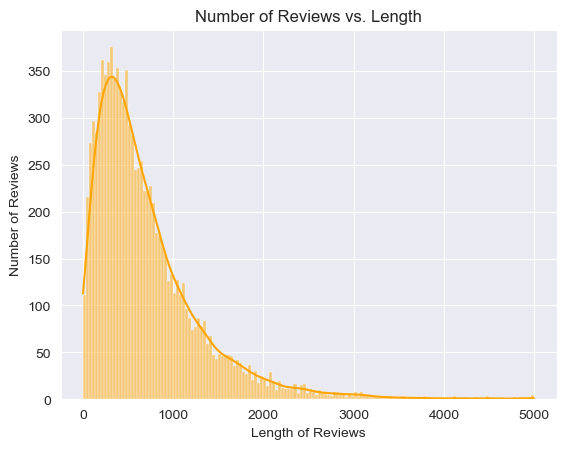

In [11]:
sns.histplot(yelp_reviews['length'], bins=150, color='orange', kde=True)
plt.title("Number of Reviews vs. Length")
plt.xlabel("Length of Reviews")
plt.ylabel("Number of Reviews")

> The histogram tells us that the length of the reviews is **positively skewed**.

> The .histplot() method from Seaborn creates a histogram as long as you provide the parameters for the number of bins (or bars). The kde is the kernel density estimate and it closely follows the top of the histogram bars. Fro

In [12]:
yelp_reviews.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

> Shows us a summary of the length column where we can observe characteristics such as mean, deviation, quartiles, and more. 

### Exploring min and max length reviews

In [13]:
yelp_reviews[yelp_reviews['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

> We know the length of the largest review is 4997 from the .describe() function. So we can use the max value to specify that we are looking for the maximum length review, then we can access it's text column and print it out.

In [14]:
yelp_reviews[yelp_reviews['length'] == 1]['text'].iloc[0]

'X'

> Using the same method from earlier to locate and print the review with the minimum length

### Plotting the star count for reviews

<AxesSubplot:xlabel='count', ylabel='stars'>

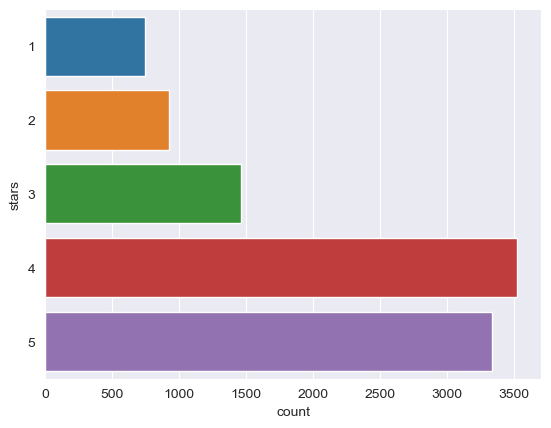

In [15]:
sns.countplot(y = 'stars', data = yelp_reviews)

> Using the Seaborn .countplot() method to assign the y-axis as the stars column from the yelp_reviews dataset

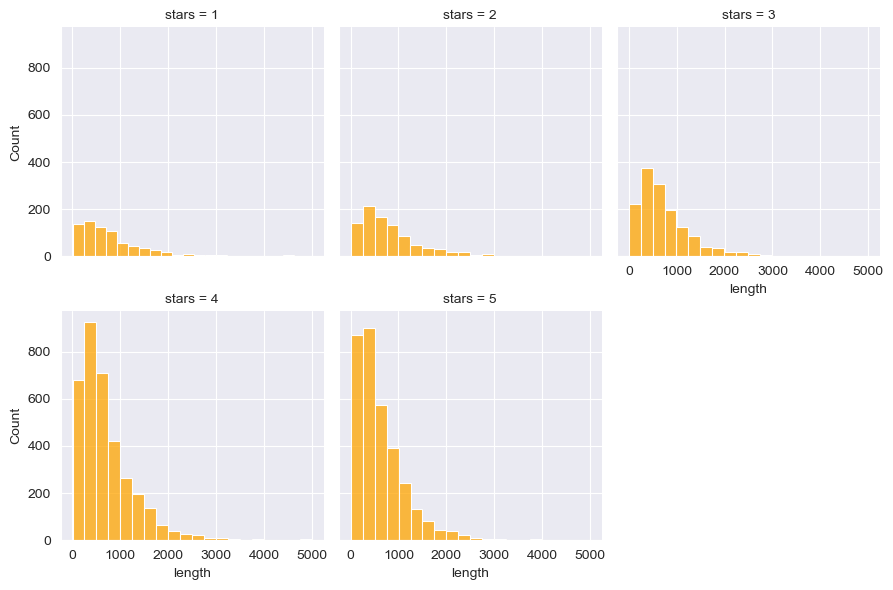

In [16]:
facet = sns.FacetGrid(data = yelp_reviews, col = 'stars', col_wrap = 3)
facet.map(sns.histplot, 'length', bins = 20, color = 'orange')

> Created facet graphs for each group of star counts (1 to 5) and their lengths, we can see that the **length increases as the number of stars increases**

### Creating 1 and 5 Star datasets


In [17]:
yelp_reviews_1star = yelp_reviews[yelp_reviews['stars'] == 1]

> Targetting the data in the stars column with the value of 1 and storing them in the variable yelp_reviews_1star

In [18]:
yelp_reviews_1star

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [19]:
yelp_reviews_5star = yelp_reviews[yelp_reviews['stars'] == 5]

> Target the 5 star reviews and store them in yelp_reviews_5star

In [20]:
yelp_reviews_5star

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [21]:
yelp_reviews_1_5stars = pd.concat([yelp_reviews_1star, yelp_reviews_5star])

> Using Pandas' .concat() method to concatenate the 1 and 5 star dataset and storing it in the yelp_reviews_1_5stars dataset

In [22]:
yelp_reviews_1_5stars

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [23]:
yelp_reviews_1_5stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


> Showing the information behind the concatenated dataframe, including the number of entries and colomn data types

In [24]:
print("1-Star Reviews = ", round((len(yelp_reviews_1star) / len(yelp_reviews_1_5stars)) * 100, 2), "%")

print("5-Star Reviews = ", round((len(yelp_reviews_5star) / len(yelp_reviews_1_5stars)) * 100, 2), "%")

1-Star Reviews =  18.33 %
5-Star Reviews =  81.67 %


> Our **data is not evenly balanced** because the two extreme star count values are not the same. A balanced dataset would have the 1-star reviews take up half of the 1 and 5 star reviews dataset.

### Plotting the 1 and 5 star reviews

<AxesSubplot:xlabel='stars', ylabel='count'>

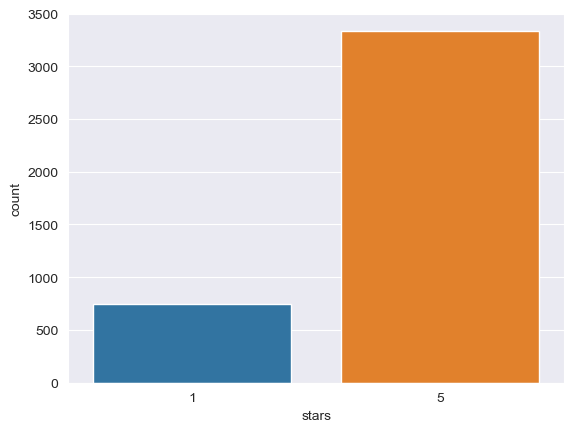

In [25]:
sns.countplot(x = yelp_reviews_1_5stars['stars'], data = yelp_reviews_1_5stars, label = 'Count')

## Process data with NLP techniques

To prepare the data for training we need to perform so fundamental natural language
processing techniques for the dataset to be ready. These techniques **clean the data
and allow the model to interpret it without any unnecessary information** clouding 
the model's performance. 

The model is able to interpret data from a matrix of words and their frequency 
count called a count vectorizer. The count vectorizer essentially contains a list
of all uncommon words and numbers, as well as how often they occur in each review. 
For example, if the word "excellent" is used 3 times in a review, the model can 
most likely predict that the review is a highly rated review. 

### Removing punctuation

For the count vectorizer to work properly, the text needs to be cleaned to **remove 
any punctuation** or common (meaningless) words aka stopwords. To remove punctuation
we will run a **for loop to check every character in every review** and only **keep the
characters that are not in our list** of punctuation. 

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

> Importing the string package to identify the useless punctuation symbols that exist in our dataset

In [27]:
# Defining a function for removing punctuation
def removing_punc(message):
    Text_punc_removed = []
    
    
    for char in message:
        if char not in string.punctuation:
            Text_punc_removed.append(char)
    
    Text_punc_joined = "".join(Text_punc_removed)
    
    return Text_punc_joined

> The **removin_punc function removes punctuation** by taking in the message as input and creates an empty array to store our results in. It checks every character in the message and then checks to see if its a punctuation. If the character is not, then it gets added to the array for results. After the letters have been added, the .join() method **joins the letters back together into groups**

In [28]:
yelp_nopunc = yelp_reviews['text'].apply(removing_punc)

In [29]:
yelp_nopunc

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate Rice is so good and I also...
3       Rosie Dakota and I LOVE Chaparral Dog Park Its...
4       General Manager Scott Petello is a good egg No...
                              ...                        
9995    First visitHad lunch here today  used my Group...
9996    Should be called house of deliciousness\n\nI c...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    45 locations all 45 star average I think Arizo...
Name: text, Length: 10000, dtype: object

### Removing stopwords

Next, the meaningless **stop words need to be removed** by repeating the same process 
as before. Use a **for loop to check if the word is in our list** of stop words, and 
then only **keeping the ones not in the list**. 

In [30]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

len(stopwords.words('english'))

179

> Imports the natural language toolkit, or nltk, and import the stopwords module which includes a list of 179 stopwords. Stopwords are **common words that are unncessary** during training.

In [31]:
# Defining a function for removing stop words
def removing_stopwords(message):
    Text_clean = []
    
    for word in message.split():
        if word.lower() not in stopwords.words('english'):
            Text_clean.append(word)

    return Text_clean

> The **removing_stopwords function removes stopwords** by creating an empty array for storing the clean results and then going through every word in the text with punctuation removed. The **.split() method splits the strings into a list** so we can iterate through it. We then use the **.lower() method to convert the string into lowercase** and then checking to see if they are in our list of stopwords. If the word is not, then they are added to our result array

In [32]:
yelp_clean = yelp_nopunc.apply(removing_stopwords)

> Assigning the cleaned up **yelp reviews with no punctuation or stopwords** to the variable **yelp_clean**

In [33]:
print(yelp_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


> Verifying the first cleaned up review has no punctuation or stopwords

### Creating Count Vectorizer

Finally, we **use the cleaned text to create a count vectorizer** from our sci-kit 
learn library class. The count vectorizer will fit around our clean data and then
transform into a matrix of words and frequencies. It **converts text into numerical representation by creating a matrix that shows the frequency in occurences of tokenized words**. The text input is tokenized into words or n-grams (small groups of words) and then counts each occurence of that group.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

> Importing the CountVectorizer class from sklearn and creating a vectorizer instance object under the class

In [35]:
yelp_vectorizer = vectorizer.fit_transform([' '.join(i) for i in yelp_clean])

> Use the .join() method to **join every word in the yelp_clean list** back into a review (the words were seperated so we could iterate through them). Then use the .fit_transform() method from the vectorizer class to **fit the data to the vectorizer** and create the count vectorizer matrix, **store the results in yelp_vectorizer**

In [36]:
print(vectorizer.get_feature_names_out())

print(len(vectorizer.get_feature_names_out()))

yelp_vectorizer.shape

['00' '007' '00s' ... 'éclairs' 'école' 'ém']
36237


(10000, 36237)

> Our count vectorizer matix has **36,237 unique words from 10,000 reviews**.

## Applying Naive Bayes classifier

In [37]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

> Importing the naive bayes classifier we will be using for this project from sci-kit learn and then **creating the object NB_classifier** from the class

In [38]:
label = yelp_reviews['stars'].values

label

array([5, 5, 4, ..., 4, 2, 5], dtype=int64)

> Assigning the variable label to the values in the stars column. This means that **label is an array containing star count**

### Training on entire dataset (for fun)

In [39]:
NB_classifier.fit(yelp_vectorizer, label)

MultinomialNB()

> Training the model to the entire dataset (not recommended) **just for fun** because I want to test the model with my own reviews.

In [49]:
sample = [input()]

testing_sample = vectorizer.transform(sample)

sample_predict = NB_classifier.predict(testing_sample)

sample_predict

I hated eating here, the food was bad


array([4], dtype=int64)

> Creating a **fun section to test my own reviews** on here, it is good at detecting obvious ones but sometimes it gives wrong answers for some of the reviews that are clearly wrong. For example, try typing "I hated eating here, the food was bad" which sounds like a one star review but it thinks it's a four star review

## Splitting the dataset

In [55]:
X = yelp_vectorizer
X.shape

(10000, 36237)

> Our features dataset (X) will be the count vectorizer which stores the frequency of all the uncommon words 10,000 reviews

In [54]:
y = label
y.shape

(10000,)

> The dependent variable (y) is the labeled star count for every review

In [41]:
from sklearn.model_selection import train_test_split

> Importing the train_test_split function to split the dataset into training and testing sets

In [59]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2)

> Splitting the data into training and testing sets for features and dependent variables

## Training the model

In [58]:
from sklearn.naive_bayes import MultinomialNB

NB_classfier = MultinomialNB()

In [57]:
NB_classifier = 